In [1]:
import numpy as np
import pandas as pd

# 1. Data

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
dataset = fetch_openml("mnist_784", version=1)
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 1.1. Features

In [4]:
X: pd.DataFrame = dataset["data"]

In [5]:
X = X / 255.0  # scaling for gradient descent

In [6]:
X.shape

(70000, 784)

In [7]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2. Target

In [8]:
y: pd.DataFrame = dataset["target"]

In [9]:
y = y.astype(int)

In [10]:
y.shape

(70000,)

In [11]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

In [12]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

## 1.3. Instance

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Find the first occurance of the number eight

In [14]:
arg = np.argwhere(y.astype(int) == 8)[0]

Plot the number eight

In [15]:
instance = X.iloc[arg].to_numpy()

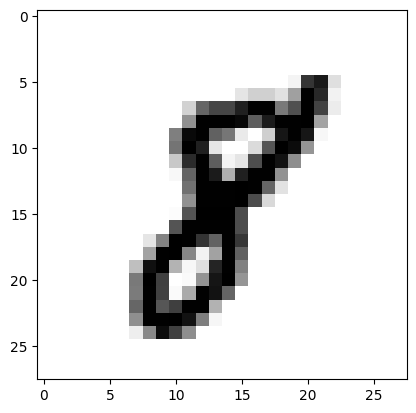

In [16]:
plt.imshow(instance.reshape(28, 28), cmap="binary")
plt.show()

# 2. Binary

## 2.1. Train

Multiclass for the all numbers

In [17]:
SPLIT = 60000

In [18]:
X_train, X_test, y_train, y_test = X[:SPLIT], X[SPLIT:], y[:SPLIT], y[SPLIT:]

In [19]:
SPLIT = 50000

In [20]:
X_train, X_valid, y_train, y_valid = (
    X_train[:SPLIT],
    X_train[SPLIT:],
    y_train[:SPLIT],
    y_train[SPLIT:],
)

Check dimensions

In [21]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

In [22]:
X_valid.shape, y_valid.shape

((10000, 784), (10000,))

In [23]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

### 2.1.1. Baseline

In [24]:
from sklearn.base import BaseEstimator

In [25]:
class NeverFiveClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [26]:
baseline = NeverFiveClassifier()

Compute average accuracy with cross validation 

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores_dict = dict()

for i in range(0, 10):
    scores = cross_val_score(
        baseline,
        X_train,
        y_train.apply(lambda x: int(x) == i),
        cv=3,
        scoring="accuracy",
    )
    scores_dict[i] = scores

In [29]:
for k in scores_dict.keys():
    print(k, np.mean(scores_dict[k]))

0 0.9013599819207263
1 0.8864400271096943
2 0.9006399603197184
3 0.8979800015184143
4 0.9028200043223426
5 0.9098800107281185
6 0.9009800027208383
7 0.8965000023172464
8 0.9031599735219985
9 0.9002400355209024


### 2.1.2. Model

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(784,)),
        keras.layers.Dense(256, activation=keras.activations.relu),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(10, activation=keras.activations.softmax),
    ]
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile and train

In [33]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [34]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)]

In [35]:
hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7177 - loss: 1.0669 - val_accuracy: 0.9093 - val_loss: 0.3249
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9093 - loss: 0.3175 - val_accuracy: 0.9282 - val_loss: 0.2516
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2555 - val_accuracy: 0.9388 - val_loss: 0.2199
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.2193 - val_accuracy: 0.9459 - val_loss: 0.1947
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9424 - loss: 0.1962 - val_accuracy: 0.9520 - val_loss: 0.1736
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9497 - loss: 0.1755 - val_accuracy: 0.9570 - val_loss: 0.1600
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9575 - loss: 0.1537 - val_accuracy: 0.9579 - val_loss: 0.1531
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0

Plot train history over time

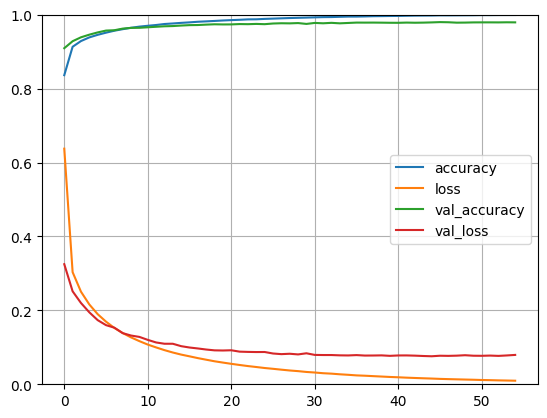

In [36]:
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 2.2. Validate

### 2.2.1. Metrics

Compute the predictions per instance

In [37]:
preds = model.predict(X_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step


In [38]:
np.argmax(preds[arg])

np.int64(8)

In [39]:
preds.shape

(50000, 10)

In [40]:
preds = np.array([np.argmax(x) for x in preds])

In [41]:
preds.shape

(50000,)

Compute the confusion matrix (tn, fp, fn, tp)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
matrix = confusion_matrix(y_train, y_train)  # sanity check
matrix

array([[4932,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 5678,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4968,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5101,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4859,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4506,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4951,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5175,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4842,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4988]])

In [44]:
matrix = confusion_matrix(y_train, preds)
matrix

array([[4927,    0,    0,    0,    0,    0,    3,    0,    1,    1],
       [   0, 5663,    3,    1,    3,    0,    0,    5,    2,    1],
       [   1,    2, 4958,    0,    0,    0,    0,    4,    3,    0],
       [   0,    0,    2, 5090,    0,    1,    0,    1,    3,    4],
       [   0,    0,    0,    0, 4856,    0,    1,    0,    0,    2],
       [   0,    0,    0,    0,    0, 4504,    1,    0,    0,    1],
       [   2,    0,    0,    0,    1,    0, 4947,    0,    1,    0],
       [   1,    3,    2,    0,    0,    0,    0, 5168,    0,    1],
       [   1,    3,    0,    1,    0,    1,    3,    0, 4832,    1],
       [   0,    1,    0,    0,    2,    0,    0,    4,    1, 4980]])

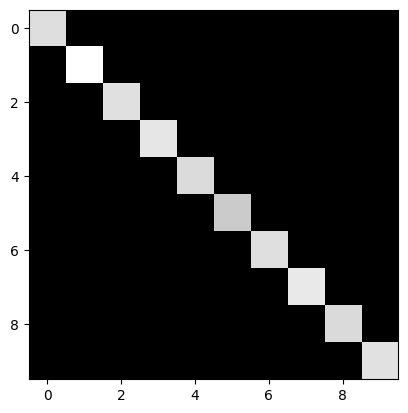

In [45]:
plt.imshow(matrix, cmap="gray")
plt.show()

Normalise by the amount of instances and keep erros only

In [46]:
row_sum = matrix.sum(axis=1, keepdims=True)
norm_matrix = matrix / row_sum

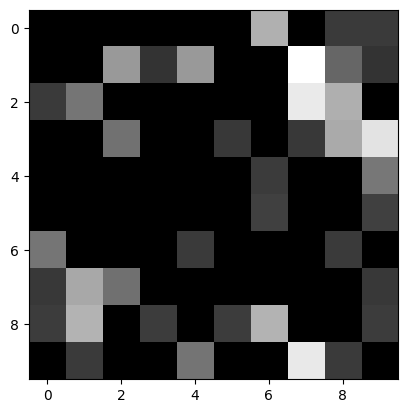

In [47]:
np.fill_diagonal(norm_matrix, 0)
plt.imshow(norm_matrix, cmap="gray")
plt.show()

Compute metrics for the number 8

In [48]:
tp = matrix[8, 8]
fn = matrix[8, :].sum() - tp
fp = matrix[:, 8].sum() - tp
tn = matrix.sum() - (tp + fn + fp)

In [49]:
np.array([[tn, fp], [fn, tp]])

array([[45147,    11],
       [   10,  4832]])

In [50]:
metrics = dict(acc=(tn + tp) / len(y_train), pre=tp / (tp + fp), rec=tp / (tp + fn))
metrics[" f1"] = (
    2 * (metrics["pre"] * metrics["rec"]) / (metrics["pre"] + metrics["rec"])
)

In [51]:
for k in metrics.keys():
    print(k, metrics[k])

acc 0.99958
pre 0.9977286805698947
rec 0.9979347377116894
 f1 0.9978316985028395


## 2.3. Test

### 2.3.1. Accuracy

In [52]:
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9767 - loss: 0.0784


[0.07580552250146866, 0.9790999889373779]

In [53]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.9756 - loss: 0.0813


[0.07004940509796143, 0.9789999723434448]

### 2.3.2. Metrics

In [54]:
preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


In [55]:
preds.shape

(10000, 10)

In [56]:
preds = np.array([np.argmax(x) for x in preds])

In [57]:
preds.shape

(10000,)

In [58]:
matrix = confusion_matrix(y_test, preds)
matrix

array([[ 970,    0,    1,    1,    1,    0,    2,    1,    3,    1],
       [   0, 1126,    3,    0,    0,    1,    2,    1,    2,    0],
       [   6,    1, 1009,    2,    3,    0,    2,    4,    5,    0],
       [   0,    0,    4,  988,    0,    5,    0,    4,    4,    5],
       [   1,    0,    1,    1,  958,    0,    6,    1,    1,   13],
       [   3,    0,    0,    6,    2,  865,    8,    1,    5,    2],
       [   5,    2,    1,    1,    2,    4,  942,    0,    1,    0],
       [   0,    4,    8,    2,    0,    0,    0, 1008,    2,    4],
       [   4,    0,    4,    6,    2,    2,    5,    2,  946,    3],
       [   4,    3,    0,    6,    9,    3,    0,    4,    2,  978]])

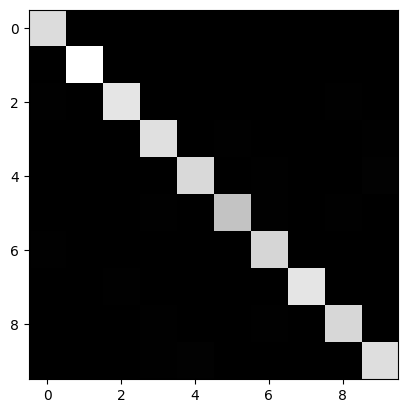

In [59]:
plt.imshow(matrix, cmap="gray")
plt.show()

In [60]:
row_sum = matrix.sum(axis=1, keepdims=True)
norm_matrix = matrix / row_sum

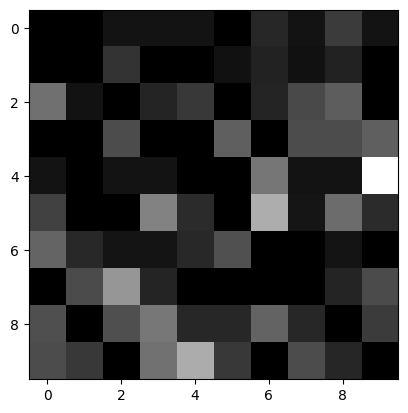

In [61]:
np.fill_diagonal(norm_matrix, 0)
plt.imshow(norm_matrix, cmap="gray")
plt.show()

Compute metrics for the number 8

In [62]:
tp = matrix[8, 8]
fn = matrix[8, :].sum() - tp
fp = matrix[:, 8].sum() - tp
tn = matrix.sum() - (tp + fn + fp)

In [63]:
np.array([[tn, fp], [fn, tp]])

array([[9001,   25],
       [  28,  946]])

In [64]:
metrics = dict(acc=(tn + tp) / len(y_test), pre=tp / (tp + fp), rec=tp / (tp + fn))
metrics[" f1"] = (
    2 * (metrics["pre"] * metrics["rec"]) / (metrics["pre"] + metrics["rec"])
)

In [65]:
for k in metrics.keys():
    print(k, metrics[k])

acc 0.9947
pre 0.9742533470648815
rec 0.971252566735113
 f1 0.9727506426735218
